In [24]:
from sklearn.datasets import make_classification
from scipy.stats import pearsonr
from sklearn import svm
import numpy as np
import numpy_indexed as npi
import random
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import pingouin as pg
from simulate_infocoupl import generate_data, trainandtest_svm

In [46]:
# Generate correlated activations and separations
min_act = 0.
max_act = 3.6
slope = 0.6
intercept = 0.
sigma = 0.01


activations = []
separations = []
for _ in range(1000):
    act = random.uniform(min_act, max_act)
    sep = slope*act + intercept + np.random.normal(0., sigma)
    activations.append(act)
    separations.append(sep)

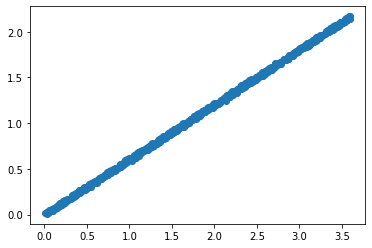

In [47]:
plt.scatter(activations, separations)
plt.show()

In [48]:
pearsonr(activations, separations)

(0.9998629632395319, 0.0)

In [49]:
# Turn separations into accuracies
accuracies = []
for s in tqdm(separations):
    x, y = generate_data(s)
    accuracies.append(trainandtest_svm(x, y))

  0%|          | 0/1000 [00:00<?, ?it/s]

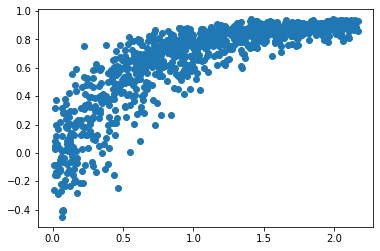

In [50]:
plt.scatter(separations, accuracies)
plt.show()

In [51]:
pearsonr(activations, accuracies)

(0.8114898886927021, 4.412344936611322e-235)

In [43]:
max(accuracies)

0.9534291092559956

## Effect of averaging on separation-accuracy relation

In [80]:
def random_split(ls, n_partitions, seed=0):
    assert len(ls) % n_partitions == 0
    part_length = int(len(ls)/n_partitions)
    rng = np.random.default_rng(seed=seed)
    shuffled_indices = rng.permutation(len(ls))
    shuffled_list = np.array(ls)[shuffled_indices]
    
    splits = []
    for i in range(n_partitions):
        start = int(i*part_length)
        end = start + part_length
        
        splits.append(shuffled_list[start:end])
        
    return splits

In [75]:
# Create 2D arrays with sequences of activations and separations
activations_2d = np.array(activations).reshape(100, 10)
separations_2d = np.array(separations).reshape(100, 10)

In [79]:
for i in range(100):
    assert pearsonr(activations_2d[i, :], separations_2d[i, :])[0] > 0.99

In [91]:
sep_splits = [np.mean(s, axis=0) for s in random_split(separations_2d, 4, seed=0)]
act_splits = [np.mean(a, axis=0) for a in random_split(activations_2d, 4, seed=1)]

In [92]:
for s, a in zip(sep_splits, act_splits):
    print(pearsonr(s, a)[0])

-0.009203326234945311
0.7779128984531274
0.06227423923396794
0.028031445662983025


In [85]:
len(sep_splits)

4